# Figure 2.11-14 Model reduction

In [1]:
using LinearAlgebra
using DifferentialEquations
using Parameters
using LabelledArrays

using Plots
Plots.gr(fmt=:png, lw=2)

Plots.GRBackend()

In [2]:
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

## Figure 2.11 : Full model

The full biochemical reaction model

In [3]:
# Fig 2.11: Full model
function fullmodel!(du, u, p, t)
	@unpack K0, K1, KM1, K2 = p
	@unpack a, b = u
	vAB = K1 * a - KM1 * b
	du.a = K0 - vAB
	du.b = vAB - K2 * b
	return du
end

fullmodel! (generic function with 1 method)

In [11]:
p1 = (K0=0, K1=9, KM1=12, K2=2)
u0 = LVector(a=0.0, b=10.0)

2-element LArray{Float64, 1, Vector{Float64}, (:a, :b)}:
 :a => 0.0
 :b => 10.0

In [14]:
sol1full = solve(ODEProblem(fullmodel!, u0, 3.0, p1))

retcode: Success
Interpolation: automatic order switching interpolation
t: 34-element Vector{Float64}:
 0.0
 8.33250002662905e-6
 9.165750029291953e-5
 0.0009249075029558242
 0.004925551957360877
 0.012950994749922366
 0.024203391128378236
 0.03867703241372845
 0.05687483596189583
 0.07885040292991835
 0.10491525261637588
 0.13531142723966036
 0.17058210067041177
 ⋮
 1.274482102556651
 1.448935061082541
 1.6048516285159593
 1.751791810142831
 1.8976421480307348
 2.0465348744106664
 2.199447810412539
 2.355340275358147
 2.5124116619064183
 2.66919607560664
 2.825050506773675
 3.0
u: 34-element Vector{LArray{Float64, 1, Vector{Float64}, (:a, :b)}}:
 2-element LArray{Float64, 1, Vector{Float64}, (:a, :b)}:
 :a => 0.0
 :b => 10.0
 2-element LArray{Float64, 1, Vector{Float64}, (:a, :b)}:
 :a => 0.0009998041949395534
 :b => 9.99883355552422
 2-element LArray{Float64, 1, Vector{Float64}, (:a, :b)}:
 :a => 0.010987314386434823
 :b => 9.987180710981443
 2-element LArray{Float64, 1, Vector{Float

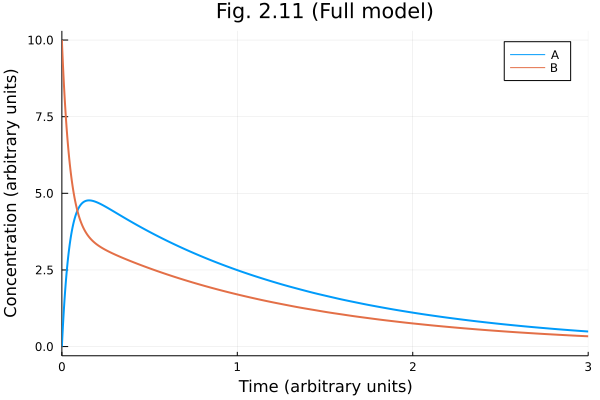

In [13]:
plot(sol1full, xlabel="Time (arbitrary units)", ylabel="Concentration (arbitrary units)", 
     title="Fig. 2.11 (Full model)", label=["A" "B"])

## Figure 2.12 : Rapid equilibrium assumption

In [4]:
# Fig 2.12: rapid equilibrium
function remodel!(du, u, p, t)
	@unpack K0, K1, KM1, K2 = p
	kb = K2 * hill(K1, KM1)
	du.b = K0 - kb * u.b
end

remodel! (generic function with 1 method)

In [16]:
u0re = LVector(b=sum(u0))
sol1re = solve(ODEProblem(remodel!, u0re, 3.0, p1))

retcode: Success
Interpolation: automatic order switching interpolation
t: 9-element Vector{Float64}:
 0.0
 0.10313309318586757
 0.3753972214163928
 0.7370511744483808
 1.167736971192613
 1.6758018339976213
 2.2474171292618523
 2.8795731630834194
 3.0
u: 9-element Vector{LArray{Float64, 1, Vector{Float64}, (:b,)}}:
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:
 :b => 10.0
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:
 :b => 9.153948340781719
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:
 :b => 7.248655940128676
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:
 :b => 5.3165632318267075
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:
 :b => 3.675423066117156
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:
 :b => 2.377823083643278
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:
 :b => 1.456785763401659
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:
 :b => 0.8473772497970447
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:

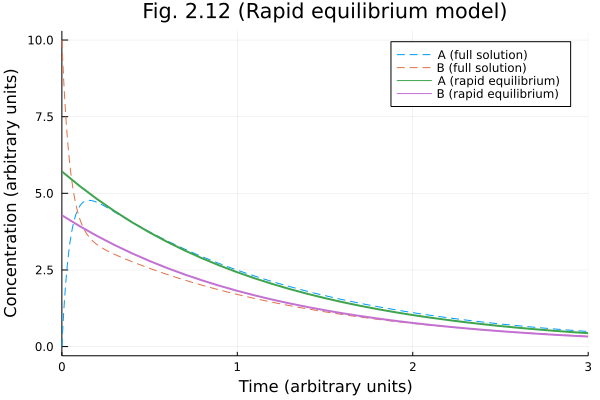

In [19]:
ts = 0.0:0.1:3.0
b̃ = sol1re(ts, idxs=1) # \tilde<TAB>

pl2 = plot(sol1full, line=(:dash, 1),label=["A (full solution)" "B (full solution)"])
plot!(pl2, ts, (p1.KM1 / (p1.KM1 + p1.K1)) .* b̃, lab="A (rapid equilibrium)")
plot!(pl2, ts, (p1.K1 / (p1.KM1 + p1.K1))  .* b̃, lab="B (rapid equilibrium)")
plot!(pl2, title="Fig. 2.12 (Rapid equilibrium model)", 
      xlabel="Time (arbitrary units)", ylabel="Concentration (arbitrary units)")

## Figure 2.13: Rapid equilibrium 

with another set of parameters

In [20]:
tspan = 3.0
p2 = (K0=9, K1=20, KM1=12, K2=2)
u1 = LVector(a=8.0, b=4.0)
u1re = LVector(b=sum(u1))
sol2full = solve(ODEProblem(fullmodel!, u1, tspan, p2));
sol2re = solve(ODEProblem(remodel!, u1re, tspan, p2));

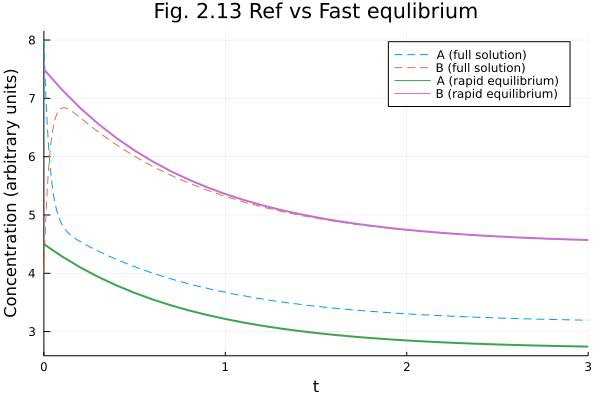

In [22]:
ts = 0.0:0.1:tspan
b̃ = sol2re(ts, idxs=1)
pl3 = plot(title="Fig. 2.13 Ref vs Fast equlibrium", xlabel="Time (arbitrary units)", ylabel="Concentration (arbitrary units)")
plot!(pl3, sol2full, line=(:dash, 1),label=["A (full solution)" "B (full solution)"])
plot!(pl3, ts, (p2.KM1 / (p2.KM1 + p2.K1)) .* b̃, lab="A (rapid equilibrium)")
plot!(pl3, ts, (p2.K1 / (p2.KM1 + p2.K1))  .* b̃, lab="B (rapid equilibrium)")

## Figure 2.14 : QSSA

Quasi-steady state assumption on species A

In [5]:
# Figure 2.14: Quasi-steady state assumption(QSSA)
function qssmodel!(du, u, p, t)
	@unpack K0, K2 = p
	du.b = K0 - K2 * u.b
end

qssmodel! (generic function with 1 method)

In [24]:
# The initial conditions in QSSA could be tricky
u1qss = LVector(b = (p2.K1 * sum(u1) - p2.K0) / (p2.K1 + p2.KM1))
sol2qss = solve(ODEProblem(qssmodel!, u1qss, tspan, p2))

retcode: Success
Interpolation: automatic order switching interpolation
t: 11-element Vector{Float64}:
 0.0
 0.09213371408627079
 0.2580853720636457
 0.45792006215587877
 0.7105343618980664
 1.0087389420803021
 1.3646427506632768
 1.7813284514137806
 2.2736032791158305
 2.8565648455183186
 3.0
u: 11-element Vector{LArray{Float64, 1, Vector{Float64}, (:b,)}}:
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:
 :b => 7.21875
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:
 :b => 6.761220680089925
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:
 :b => 6.1225543617019555
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:
 :b => 5.58799115197771
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:
 :b => 5.156461132335911
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:
 :b => 4.8615740496779285
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:
 :b => 4.677452873414214
 1-element LArray{Float64, 1, Vector{Float64}, (:b,)}:
 :b => 4.577129233230205
 1-eleme

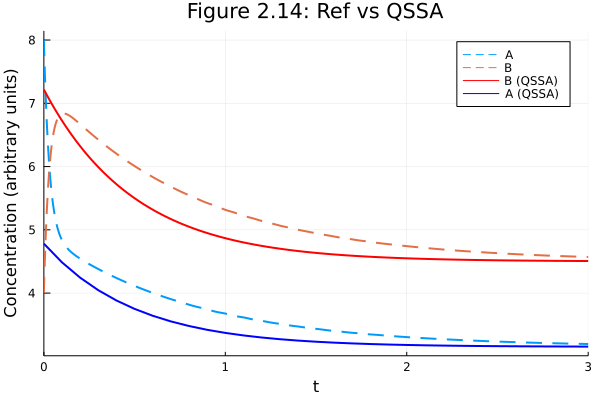

In [26]:
ts = 0.0:0.1:tspan
b̃ = sol2qss(ts, idxs=1)
pl4 = plot(sol2full, line=(:dash, 2), xlims=tspan,
 xlabel="Time (arbitrary units)",
 ylabel="Concentration (arbitrary units)",
 title="Figure 2.14: Ref vs QSSA",
 label=["A" "B"])

plot!(pl4, sol2qss, label="B (QSSA)", line=(2, :red))
plot!(pl4, ts, (p2.K0 .+ p2.KM1 .* b̃) ./ p2.K1, label="A (QSSA)", line=(2, :blue))